<a href="https://colab.research.google.com/github/sophiasy88/MATH3364_25Spring/blob/main/HW2Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Default.csv to Default.csv


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split


In [30]:
#Question1 men and women data odds
# Given data
women_total = 150
men_total = 140

women_A = 71
men_A = 87

women_B = women_total - women_A
men_B = men_total - men_A

# Calculate odds for selecting A and B for women
women_odds_A = women_A / women_B
women_odds_B = women_B / women_A

# Calculate odds for selecting A and B for men
men_odds_A = men_A / men_B
men_odds_B = men_B / men_A

print("Women Odds (A)", women_odds_A)
print("Women Odds (B)", women_odds_B)
print("Men Odds (A)", men_odds_A)
print("Men Odds (B)", men_odds_B)

Women Odds (A) 0.8987341772151899
Women Odds (B) 1.1126760563380282
Men Odds (A) 1.6415094339622642
Men Odds (B) 0.6091954022988506


In [31]:
# Question 2: Cardiovascular Disease and Odds Ratio
# -------------------------

# Given data
high_bp_total = 3338
low_bp_total = 2676

high_bp_deaths = 55
low_bp_deaths = 21

# Proportion of deaths
high_bp_proportion = high_bp_deaths / high_bp_total
low_bp_proportion = low_bp_deaths / low_bp_total

# Odds of deaths
high_bp_odds = high_bp_deaths / (high_bp_total - high_bp_deaths)
low_bp_odds = low_bp_deaths / (low_bp_total - low_bp_deaths)

# Odds ratio
odds_ratio = high_bp_odds / low_bp_odds

print("High BP Proportion", high_bp_proportion)
print("Low BP Proportion", low_bp_proportion)
print("High BP Odds", high_bp_odds)
print("Low BP Odds", low_bp_odds)
print("Odds Ratio", odds_ratio)

High BP Proportion 0.0164769322947873
Low BP Proportion 0.007847533632286996
High BP Odds 0.01675296984465428
Low BP Odds 0.007909604519774011
Odds Ratio 2.118054044645577


If OR > 1, the risk is higher in the High BP group.
If OR = 1, both groups have the same risk.
If OR < 1, the risk is lower in the High BP group.

In [14]:
default_data = pd.read_csv('Default.csv')
# Convert categorical variables
default_data['default'] = default_data['default'].apply(lambda x: 1 if x == 'Yes' else 0)
default_data['student'] = default_data['student'].apply(lambda x: 1 if x == 'Yes' else 0)

# Prepare predictors and target
X = default_data.drop(columns=['default'])
y = default_data['default']

In [15]:
# Prepare predictors and target
X = default_data.drop(columns=['default'])
y = default_data['default']

In [16]:
model = LogisticRegression()
model.fit(X, y)


LogisticRegression()

In [17]:
# Predictions
y_pred = model.predict(X)
y_pred_proba = model.predict_proba(X)[:, 1]

In [19]:
# Confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[9627   40]
 [ 228  105]]


In [21]:
# Accuracy and error rate
accuracy = accuracy_score(y, y_pred)
error_rate = 1 - accuracy
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)

Accuracy: 0.9732
Error Rate: 0.026800000000000046


In [25]:
# Recall, precision, F1 score
recall = recall_score(y, y_pred)
precision = precision_score(y, y_pred)
f1 = f1_score(y, y_pred)
print("Recall", recall)
print("Precision", precision)
print("F1 Score", f1)

Recall 0.3153153153153153
Precision 0.7241379310344828
F1 Score 0.4393305439330544


In [27]:
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9667
           1       0.72      0.32      0.44       333

    accuracy                           0.97     10000
   macro avg       0.85      0.66      0.71     10000
weighted avg       0.97      0.97      0.97     10000



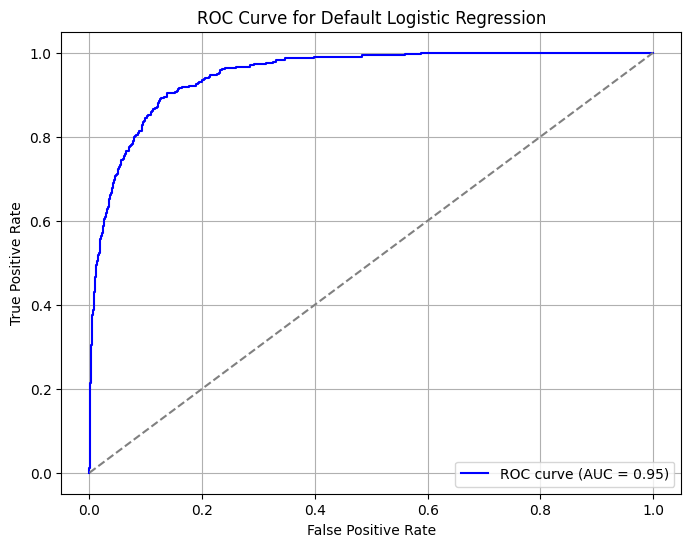

In [28]:
# ROC Curve
fpr, tpr, _ = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Default Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()